In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
def get_test_real_data(sequence):

    data_real = pd.read_csv("/remote-home/21310019/2024/pv_TSTR/TS/data_folder/ori_pv_start_from_0101.csv",usecols=["PV/kwh"]).values
    
    def normalization(data):
        _range = np.max(data) - np.min(data)
        return (data - np.min(data)) / _range
    data_real_ = normalization(data_real)
    data_real_ = data_real_[9408:,:].reshape(-1,24)

    #class_label = data_npz["arr_1"]
    daily_slice = []
    daily_length_list = []
    daily_length_count = []

    for i in range(data_real_.shape[0]):
        daily = data_real_[i,:]
        sub_slice = []
        for j in range(24):
            if daily[j] != 0:
                daily_length_count.append(j)
                sub_slice.append(daily[j])
        daily_length_list.append(len(sub_slice)) 
        daily_slice.append(sub_slice)  

    #print(len(daily_slice))####416  
    pv_drop0 = None
    for i in range(len(daily_slice)):
        fea = np.array(daily_slice[i])
        if pv_drop0 is None:
            pv_drop0 = fea
        else:
            pv_drop0 = np.concatenate([pv_drop0,fea],axis=0)

    X = []
    Y = []
    for i in range(pv_drop0.shape[0] - sequence):
        X.append(pv_drop0[i:(i + sequence)])##[4,1]
        Y.append(pv_drop0[i + sequence])##1
    print(np.array(X).shape)

    max_value = {}
    min_value = {}

    # 构建batch
    testx_pre = np.array(X)
    testx = normalization(testx_pre)
    
    max_value["testx"] = np.max(testx_pre)
    min_value["testx"] = np.min(testx_pre)

    testy_pre = np.array(Y)
    testy = normalization(testy_pre)
    max_value["testy"] = np.max(testy_pre)
    min_value["testy"] = np.min(testy_pre)

    return testx_pre,testy_pre

def get_fake_data(data_path,sequence):
    
    data_npz = np.load(
            data_path)
    data_real = pd.read_csv("/remote-home/21310019/2024/pv_TSTR/TS/data_folder/ori_pv_start_from_0101.csv",usecols=["PV/kwh"]).values
    
    def normalization(data):
        _range = np.max(data) - np.min(data)
        return (data - np.min(data)) / _range
    
    ori_data = np.mean(data_npz["arr_0"],axis = 1)
    data_real_ = np.concatenate([data_real[:8616,:],data_real[9408:,:]],axis = 0).reshape(-1,24)
    ori_data_ = np.concatenate([normalization(data_real[:8616,:].reshape(-1,24)),normalization(ori_data)],axis = 0)
    #class_label = data_npz["arr_1"]
    daily_slice = []
    daily_length_list = []
    daily_length_count = []

    for i in range(ori_data_.shape[0]):
        daily = ori_data_[i,:]
        sub_slice = []
        for j in range(24):
            if daily[j] != 0:
                daily_length_count.append(j)
                sub_slice.append(daily[j])
        daily_length_list.append(len(sub_slice)) 
        daily_slice.append(sub_slice)  

    #print(len(daily_slice))####416  
    pv_drop0 = None
    for i in range(len(daily_slice)):
        fea = np.array(daily_slice[i])
        if pv_drop0 is None:
            pv_drop0 = fea
        else:
            pv_drop0 = np.concatenate([pv_drop0,fea],axis=0)

    X = []
    Y = []
    for i in range(pv_drop0.shape[0] - sequence):
        X.append(pv_drop0[i:(i + sequence)])##[4,1]
        Y.append(pv_drop0[i + sequence])##1
    print(np.array(X).shape)

    def normalization(data):
        _range = np.max(data) - np.min(data)
        return (data - np.min(data)) / _range

    max_value = {}
    min_value = {}

    # 构建batch
    total_len = len(Y)
    train_len = int(0.9*total_len)

    
    trainx = np.array(X)
    
    max_value["trainx"] = np.max( np.array(X[:int(0.9 * total_len)]))
    min_value["trainx"] = np.min( np.array(X[:int(0.9 * total_len)]))
    
    trainy = np.array(Y)

    max_value["trainy"] = np.max(Y[:int(0.9 * total_len)])
    min_value["trainy"] = np.min(Y[:int(0.9 * total_len)])
     
    testx_pre = np.array(X[int(0.9 * total_len):])
    #testx = normalization(testx_pre)
    
    max_value["testx"] = np.max(testx_pre)
    min_value["testx"] = np.min(testx_pre)

    testy_pre = np.array(Y[int(0.9 * total_len):])
    #testy = normalization(testy_pre)
    max_value["testy"] = np.max(testy_pre)
    min_value["testy"] = np.min(testy_pre)


    return trainx, trainy

In [3]:
def get_fake_data_different_ratio(data_path,sequence,bili):
    
    data_npz = np.load(
            data_path)
    data_real = pd.read_csv("/remote-home/21310019/2024/pv_TSTR/TS/data_folder/ori_pv_start_from_0101.csv",usecols=["PV/kwh"]).values
    
    def normalization(data):
        _range = np.max(data) - np.min(data)
        return (data - np.min(data)) / _range
    
    if bili == 1:
        ori_data = np.mean(data_npz["arr_0"],axis = 1)##[359,8,24]-->[359,24]
        print("ori_fake_data_shape",ori_data.shape)
        ori_data_ = np.concatenate([normalization(data_real[:8616,:].reshape(-1,24)),normalization(ori_data)],axis = 0)
    elif bili == 2:
        ori_data = np.concatenate([np.mean(data_npz["arr_0"][:,:4,:],axis = 1),
                                   np.mean(data_npz["arr_0"][:,-4:,:],axis = 1)],
                                   axis = 0)##[359,8,24]-->[2*359,24]
        print("ori_fake_data_shape",ori_data.shape)
        ori_data_ = np.concatenate([normalization(data_real[:8616,:].reshape(-1,24)),normalization(ori_data)],axis = 0)
    else:
        ori_data = data_npz["arr_0"][:,:bili,:].reshape(-1,24)##[359,8,24]-->[2*359,24]
        print("ori_fake_data_shape",ori_data.shape)
        ori_data_ = np.concatenate([normalization(data_real[:8616,:].reshape(-1,24)),normalization(ori_data)],axis = 0)
   
    #class_label = data_npz["arr_1"]
    daily_slice = []
    daily_length_list = []
    daily_length_count = []

    for i in range(ori_data_.shape[0]):
        daily = ori_data_[i,:]
        sub_slice = []
        for j in range(24):
            if daily[j] != 0:
                daily_length_count.append(j)
                sub_slice.append(daily[j])
        daily_length_list.append(len(sub_slice)) 
        daily_slice.append(sub_slice)  

    #print(len(daily_slice))####416  
    pv_drop0 = None
    for i in range(len(daily_slice)):
        fea = np.array(daily_slice[i])
        if pv_drop0 is None:
            pv_drop0 = fea
        else:
            pv_drop0 = np.concatenate([pv_drop0,fea],axis=0)

    X = []
    Y = []
    for i in range(pv_drop0.shape[0] - sequence):
        X.append(pv_drop0[i:(i + sequence)])##[4,1]
        Y.append(pv_drop0[i + sequence])##1
    print(np.array(X).shape)

    def normalization(data):
        _range = np.max(data) - np.min(data)
        return (data - np.min(data)) / _range

    max_value = {}
    min_value = {}

    # 构建batch
    total_len = len(Y)
    train_len = int(0.9*total_len)

    
    trainx = np.array(X)
    
    max_value["trainx"] = np.max( np.array(X[:int(0.9 * total_len)]))
    min_value["trainx"] = np.min( np.array(X[:int(0.9 * total_len)]))
    
    trainy = np.array(Y)

    max_value["trainy"] = np.max(Y[:int(0.9 * total_len)])
    min_value["trainy"] = np.min(Y[:int(0.9 * total_len)])
     
    testx_pre = np.array(X[int(0.9 * total_len):])
    #testx = normalization(testx_pre)
    
    max_value["testx"] = np.max(testx_pre)
    min_value["testx"] = np.min(testx_pre)

    testy_pre = np.array(Y[int(0.9 * total_len):])
    #testy = normalization(testy_pre)
    max_value["testy"] = np.max(testy_pre)
    min_value["testy"] = np.min(testy_pre)


    return trainx, trainy

In [3]:
trainx,trainy= get_fake_data(sequence=4,data_path ='/remote-home/21310019/2024/pv_TSTR/TS/data_folder/fake_pv_arr_{}.npz'.format(0+1) )
testx_real,testy_real = get_test_real_data(sequence=4)
print(trainy.shape,testy_real.shape)##(13276,) (679,)
print(trainx.shape,testx_real.shape)##(13276,4) (679,4)
'''
a = np.random.normal(loc=0, scale=1, size=(13276,1))
b = np.random.normal(loc=0, scale=1, size=(679,1))
scaler_X = StandardScaler()
scaler_y = StandardScaler()

a_scaled = scaler_X.fit_transform(a)
b_scaled = scaler_X.transform(b)
a_scaled.shape,b_scaled.shape
'''

(13276, 4)
(679, 4)
(13276,) (679,)
(13276, 4) (679, 4)


'\na = np.random.normal(loc=0, scale=1, size=(13276,1))\nb = np.random.normal(loc=0, scale=1, size=(679,1))\nscaler_X = StandardScaler()\nscaler_y = StandardScaler()\n\na_scaled = scaler_X.fit_transform(a)\nb_scaled = scaler_X.transform(b)\na_scaled.shape,b_scaled.shape\n'

In [4]:
##1:1
rmse_list = []
for i in range(10):
    trainx,trainy= get_fake_data(sequence=4,data_path ='/remote-home/21310019/2024/pv_TSTR/TS/data_folder/fake_pv_arr_{}.npz'.format(i+1) )
    testx_real,testy_real = get_test_real_data(sequence=4)
    
    X_train_scaled =  trainx
    X_test_scaled = testx_real

    y_train_scaled = trainy
    y_test_scaled = testy_real

    # 训练SVR模型
    svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
    svr_model.fit(X_train_scaled, y_train_scaled)

    # 预测
    y_pred_scaled = svr_model.predict(X_test_scaled)
    print(y_pred_scaled.shape)
    
    # 评估模型
    mse = mean_squared_error(y_test_scaled, y_pred_scaled)
    mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
    rmse = np.sqrt(mse)
    print(f'RMSError: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    rmse_list.append(rmse)


(13276, 4)
(679, 4)


(679,)
RMSError: 0.08499617214887714
Mean Absolute Error: 0.06960232497539412
(13276, 4)
(679, 4)
(679,)
RMSError: 0.08424197725528237
Mean Absolute Error: 0.06896714636747318
(13276, 4)
(679, 4)
(679,)
RMSError: 0.08347063114141597
Mean Absolute Error: 0.06839154135416957
(13276, 4)
(679, 4)
(679,)
RMSError: 0.08279372153122978
Mean Absolute Error: 0.06775300222270894
(13276, 4)
(679, 4)
(679,)
RMSError: 0.08256380726784796
Mean Absolute Error: 0.06768885804125115
(13276, 4)
(679, 4)
(679,)
RMSError: 0.08352525040739023
Mean Absolute Error: 0.06829233766189126
(13276, 4)
(679, 4)
(679,)
RMSError: 0.08258338561913699
Mean Absolute Error: 0.06807129718146893
(13276, 4)
(679, 4)
(679,)
RMSError: 0.08331227789543144
Mean Absolute Error: 0.0685538410224276
(13276, 4)
(679, 4)
(679,)
RMSError: 0.08307896762585593
Mean Absolute Error: 0.06810506935780006
(13276, 4)
(679, 4)
(679,)
RMSError: 0.08258508897611376
Mean Absolute Error: 0.0676807920421681


In [5]:
##2:1-8:1
loss_dic = {}
for j in range(1,8):
    loss_dic[f"fake_to_real_{j+1}_bi_1"] = []
    for i in range(10):
        trainx,trainy= get_fake_data_different_ratio(sequence=4,
                                     data_path ='/remote-home/21310019/2024/pv_TSTR/TS/data_folder/fake_pv_arr_{}.npz'.format(i+1),
                                     bili= j+1)
        testx_real,testy_real = get_test_real_data(sequence=4)
        
        X_train_scaled =  trainx
        X_test_scaled = testx_real

        y_train_scaled = trainy
        y_test_scaled = testy_real

        # 训练SVR模型
        svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
        svr_model.fit(X_train_scaled, y_train_scaled)

        # 预测
        y_pred_scaled = svr_model.predict(X_test_scaled)
        print(y_pred_scaled.shape)
        
        # 评估模型
        mse = mean_squared_error(y_test_scaled, y_pred_scaled)
        mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
        rmse = np.sqrt(mse)
        #print(f'RMSError: {rmse}')
        #print(f'Mean Absolute Error: {mae}')
        loss_dic[f"fake_to_real_{j+1}_bi_1"].append(rmse)
        #rmse_list.append(rmse)
    formatted_numbers = [float(format(num, '.4f')) for num in loss_dic[f"fake_to_real_{j+1}_bi_1"]]
    print(formatted_numbers)

ori_fake_data_shape (718, 24)
(21892, 4)
(679, 4)


(679,)
ori_fake_data_shape (718, 24)
(21892, 4)
(679, 4)
(679,)
ori_fake_data_shape (718, 24)
(21892, 4)
(679, 4)
(679,)
ori_fake_data_shape (718, 24)
(21892, 4)
(679, 4)
(679,)
ori_fake_data_shape (718, 24)
(21892, 4)
(679, 4)
(679,)
ori_fake_data_shape (718, 24)
(21892, 4)
(679, 4)
(679,)
ori_fake_data_shape (718, 24)
(21892, 4)
(679, 4)
(679,)
ori_fake_data_shape (718, 24)
(21892, 4)
(679, 4)
(679,)
ori_fake_data_shape (718, 24)
(21892, 4)
(679, 4)
(679,)
ori_fake_data_shape (718, 24)
(21892, 4)
(679, 4)
(679,)
[0.084, 0.0834, 0.0828, 0.0823, 0.0824, 0.0832, 0.0821, 0.0824, 0.0825, 0.0822]
ori_fake_data_shape (1077, 24)
(30508, 4)
(679, 4)
(679,)
ori_fake_data_shape (1077, 24)
(30508, 4)
(679, 4)
(679,)
ori_fake_data_shape (1077, 24)
(30508, 4)
(679, 4)
(679,)
ori_fake_data_shape (1077, 24)
(30508, 4)
(679, 4)
(679,)
ori_fake_data_shape (1077, 24)
(30508, 4)
(679, 4)
(679,)
ori_fake_data_shape (1077, 24)
(30508, 4)
(679, 4)
(679,)
ori_fake_data_shape (1077, 24)
(30508, 4)
(679, 4)
(

In [7]:
for key in loss_dic:
    formatted_mean = [float(format(num, '.4f')) for num in loss_dic[key]]
    print(sum(formatted_mean)/10)

0.08273
0.08070999999999998
0.08131
0.08163000000000001
0.0817
0.08174000000000001
0.08198


In [8]:
mean_value_list = [0.08332]
for key in loss_dic:
    mean_value_list.append(float(format(sum(loss_dic[key])/10, '.4f')) )

mean_value_list

[0.08332, 0.0827, 0.0807, 0.0813, 0.0816, 0.0817, 0.0817, 0.082]

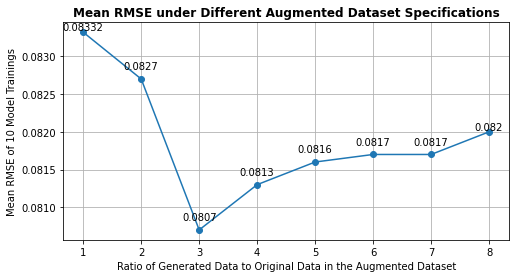

In [12]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(1,9),mean_value_list,marker='o', linestyle='-')
for i in range(len(mean_value_list)):
    if i == 7 or i==0:
        plt.text(i+1, mean_value_list[i], f'{mean_value_list[i]}', ha='center', va='bottom')
    else:
        plt.text(i+1, mean_value_list[i]+0.0001, f'{mean_value_list[i]}', ha='center', va='bottom')
## 10 Model Trainings under Different Augmented Dataset Specifications"
plt.title('Mean RMSE under Different Augmented Dataset Specifications',fontweight='bold')
plt.xticks(range(1,9))
#plt.yticks(range(500,1200,100))
plt.xlabel('Ratio of Generated Data to Original Data in the Augmented Dataset')
plt.ylabel('Mean RMSE of 10 Model Trainings')
plt.grid(True)
plt.show()

In [5]:
rmse_list

[0.08499617214887714,
 0.08424197725528237,
 0.08347063114141597,
 0.08279372153122978,
 0.08256380726784796,
 0.08352525040739023,
 0.08258338561913699,
 0.08331227789543144,
 0.08307896762585593,
 0.08258508897611376]

In [7]:
sum([0.06918,
0.06627,
0.07080,
0.06550,
0.07190,
0.06850,
0.07311,
0.06534,
0.07587,
0.06644])/10

0.06929100000000002

In [6]:
sum(rmse_list)/10

0.08331512798685817

In [ ]:
'''
# 可视化预测结果
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predicted Values', linestyle='dashed')
plt.legend()
plt.title('SVR Predictions vs True Values')
plt.show()
'''
'''[0.3029921211893107,
 0.30130456219248913,
 0.3018518344936492,
 0.3006216057587711,
 0.2996943774643601,
 0.3011251000872709,
 0.2996836350013836,
 0.3022158080125505,
 0.30162778773105625,
 0.3008244764226059]'''